## DRILL - Exploring the Central Limit Theorem



In [41]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

samp1 = np.random.choice(pop1, 100, replace=True)
samp2 = np.random.choice(pop2, 100, replace=True)

In [43]:
print('samp1 mean: ', samp1.mean())
print('samp1 standard deviation: ', samp1.std())
print('samp2 mean: ', samp2.mean())
print('samp2 standard deviation: ', samp2.std())

samp1 mean:  2.22
samp1 standard deviation:  1.30828131531
samp2 mean:  5.11
samp2 standard deviation:  1.44841292455


In [44]:
def histgen(dista, distb):
    plt.hist(dista, alpha=0.5, label='Sample 1')
    plt.hist(distb, alpha=0.5, label='Sample 2')
    plt.legend(loc='upper right')
    plt.show()
    
    print('Sample 1 mean: ', dista.mean())
    print('Sample 1 Standard Deviation: ', dista.std())
    print('Sample 2 mean: ', distb.mean())
    print('Sample 2 Standard Deviation: ', distb.std())

Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

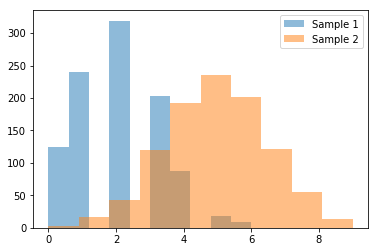

Sample 1 mean:  1.979
Sample 1 Standard Deviation:  1.26196632285
Sample 2 mean:  5.021
Sample 2 Standard Deviation:  1.66690101686


In [45]:
# Increaseing samples to 1000
samp1a = np.random.choice(pop1, 1000, replace=True)
samp2a = np.random.choice(pop2, 1000, replace=True)

histgen(samp1a, samp2a)

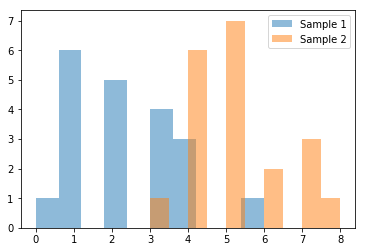

Sample 1 mean:  2.3
Sample 1 Standard Deviation:  1.41774468788
Sample 2 mean:  5.15
Sample 2 Standard Deviation:  1.27573508222


In [46]:
# Decreasing samples to 20.
samp1b = np.random.choice(pop1, 20, replace=True)
samp2b = np.random.choice(pop2, 20, replace=True)

histgen(samp1b, samp2b)


***Result:  The means are about the same.*** 

***There doesn't seem to be a pattern with the results of the standard deviations(????).***
I would think that smaller samples would have larger standard deviations.


In [47]:
from scipy.stats import ttest_ind

def tTest(sample1, sample2):
    diff = sample2.mean( ) - sample1.mean()
    size = np.array([len(sample1), len(sample2)])
    sd = np.array([sample1.std(), sample2.std()])
    
    diff_se = (sum(sd ** 2 / size)) ** 0.5
    
    print('The standard error is ', diff_se)
    
    t_value = diff/diff_se
    
    print('The t-value is ', t_value)

    print(ttest_ind(sample2, sample1, equal_var=False))

Change the population value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value.

In [48]:
pop3 = np.random.binomial(10, 0.3, 10000)
pop4 = np.random.binomial(10, 0.5, 10000)

samp3 = np.random.choice(pop3, 100, replace=True)
samp4 = np.random.choice(pop4, 100, replace=True)

tTest(samp3, samp4)

The standard error is  0.224490534322
The t-value is  8.998152221
Ttest_indResult(statistic=8.953048417070546, pvalue=2.7260032815842214e-16)


**!! t-values are slightly different?**

 Then change the population value p for group 1 to 0.4, and do it again. What changes, and why?

In [49]:
pop5 = np.random.binomial(10, 0.4, 10000)
pop6 = np.random.binomial(10, 0.5, 10000)

samp5 = np.random.choice(pop5, 100, replace=True)
samp6 = np.random.choice(pop6, 100, replace=True)

tTest(samp5, samp6)

The standard error is  0.212901385623
The t-value is  5.40156183877
Ttest_indResult(statistic=5.3744861703306821, pvalue=2.1481575167213706e-07)


**Discussion:** As the real population means get closer together, t-value gets smaller and p-values get larger.  This means, we can be less sure that the real population means are different based on our comparison of the two samples. 

Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

Population 1 mean:  4.9706959546
Population 1 standard deviation:  5.01609854351
Population 2 mean:  10.0756754696
Population 2 standard deviation:  10.0968271104


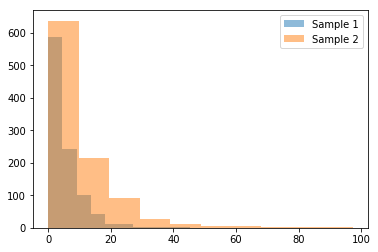

Sample 1 mean:  5.11093700456
Sample 1 Standard Deviation:  5.27251012526
Sample 2 mean:  10.31562919
Sample 2 Standard Deviation:  11.2324721942


In [50]:
pop7 = np.random.exponential(5, 10000)
pop8 = np.random.exponential(10, 10000)

print('Population 1 mean: ', pop7.mean())
print('Population 1 standard deviation: ', pop7.std())
print('Population 2 mean: ', pop8.mean())
print('Population 2 standard deviation: ', pop8.std())

samp7 = np.random.choice(pop7, 1000, replace=True)
samp8 = np.random.choice(pop8, 1000, replace=True)

histgen(samp7, samp8)

**Discussion:** The sample means and standard deviations similar to the population means and standard deviations.  With larger sample sizes, the sample statistics should be representative of the population values, regardless of the distribution.